<a href="https://colab.research.google.com/github/Luke-zm/ev_charge_ana/blob/zm/ev_charging_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the necessary packages for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Import datetime for datetime processing
from datetime import datetime, timedelta

In [ ]:
# Import the CSV file to work with
url = "https://raw.githubusercontent.com/Luke-zm/ev_charge_ana/main/pre_ana_data/updated_combined_ev_charging_data.csv"
leeds_comb_df = pd.read_csv(url)
leeds_comb_df.head()

,charging_event_id,user_id,cp_id,con_num,start_date,start_time,end_date,end_time,total_kwh,site,charger_model,charging_cost
0,383322.0,14Q3User 31,70206.0,2.0,31/12/2014,11:25,31/12/2014,11:35,0.57,Elland Road Park and Ride,APT 7kW Dual Outlet,NaN
1,383031.0,14Q3User 635,70206.0,1.0,30/12/2014,13:58,30/12/2014,15:24,4.52,Elland Road Park and Ride,APT 7kW Dual Outlet,NaN
2,381777.0,14Q3User 38,70201.0,2.0,27/12/2014,18:13,27/12/2014,19:08,0.00,Woodhouse Lane Car Park,APT 7kW Dual Outlet,NaN
3,380951.0,14Q3User 629,70208.0,1.0,24/12/2014,11:37,24/12/2014,12:06,3.16,Elland Road Park and Ride,APT 7kW Dual Outlet,NaN
4,377470.0,14Q3User 626,70204.0,2.0,18/12/2014,09:29,18/12/2014,11:56,3.16,Woodhouse Lane Car Park,APT 7kW Dual Outlet,NaN


In [ ]:
leeds_comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48448 entries, 0 to 48447
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   charging_event_id  24224 non-null  float64
 1   user_id            24224 non-null  object 
 2   cp_id              24224 non-null  float64
 3   con_num            24224 non-null  float64
 4   start_date         24224 non-null  object 
 5   start_time         24224 non-null  object 
 6   end_date           23927 non-null  object 
 7   end_time           23927 non-null  object 
 8   total_kwh          23927 non-null  float64
 9   site               24224 non-null  object 
 10  charger_model      24224 non-null  object 
 11  charging_cost      2278 non-null   float64
dtypes: float64(5), object(7)
memory usage: 4.4+ MB


In [ ]:
len(leeds_comb_df["charging_event_id"].unique())

24225

In [ ]:
len(leeds_comb_df["user_id"].unique())

1898

In [ ]:
leeds_comb_df["site"].unique()

array(['Elland Road Park and Ride', 'Woodhouse Lane Car Park',
       'Temple Green Park and Ride', 'Wellington Place ',
       'Torre Road Council Depot', nan,
       '***TEST SITE*** Charge Your Car HQ'], dtype=object)

In [ ]:
leeds_comb_df["charger_model"].unique()

array(['APT 7kW Dual Outlet', 'APT Triple Rapid Charger',
       'APT 7kW (Powershare)', nan], dtype=object)

In [ ]:
leeds_comb_df["con_num"].unique()

array([ 2.,  1., nan])

In [ ]:
leeds_comb_df["con_num"].unique()

array([ 2.,  1., nan])

Find the number of people per day.  

In [2]:
url = "https://raw.githubusercontent.com/Luke-zm/ev_charge_ana/yy/data/cleansing_ev_charging_data.csv"
df = pd.read_csv(url)
df.head()

,charging_event_id,user_id,cp_id,con_num,start_date,start_time,end_date,end_time,total_kwh,site,charger_model,start_datetime,end_datetime,duration_hr,start_day,end_day,start_period,end_period
0,383322,14Q3User 31,70206,2,2014-12-31,11:25,2014-12-31,11:35,0.57,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-12-31 11:25:00,2014-12-31 11:35:00,0.166667,Wednesday,Wednesday,morning,morning
1,383031,14Q3User 635,70206,1,2014-12-30,13:58,2014-12-30,15:24,4.52,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-12-30 13:58:00,2014-12-30 15:24:00,1.433333,Tuesday,Tuesday,afternoon,afternoon
2,381777,14Q3User 38,70201,2,2014-12-27,18:13,2014-12-27,19:08,0.00,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-12-27 18:13:00,2014-12-27 19:08:00,0.916667,Saturday,Saturday,evening,evening
3,380951,14Q3User 629,70208,1,2014-12-24,11:37,2014-12-24,12:06,3.16,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-12-24 11:37:00,2014-12-24 12:06:00,0.483333,Wednesday,Wednesday,morning,afternoon
4,377470,14Q3User 626,70204,2,2014-12-18,09:29,2014-12-18,11:56,3.16,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-12-18 09:29:00,2014-12-18 11:56:00,2.450000,Thursday,Thursday,morning,morning


In [3]:
# Change the relavent columns to datetime format
df[["start_datetime", "end_datetime"]] = df[["start_datetime", "end_datetime"]].apply(pd.to_datetime, yearfirst=True, format="%Y-%m-%d %H:%M:%S")

Drop test site.

In [4]:
df = df[~df['site'].str.contains('test site', case=False)]
df.reset_index(drop=True, inplace=True)
df["site"].unique()

array(['Elland Road Park and Ride', 'Woodhouse Lane Car Park',
       'Temple Green Park and Ride', 'Wellington Place ',
       'Torre Road Council Depot'], dtype=object)

1. Find the number of days with active users.  
2. Find the number of user per time period for weekdays and weekends.  

In [5]:
weekdays = ['Wednesday', 'Tuesday', 'Thursday', 'Friday', 'Monday']
df_weekday = df.loc[df['start_day'].isin(weekdays)]
df_weekday.shape

(20267, 18)

In [6]:
df_weekend = df.loc[df['start_day'].isin(['Saturday', 'Sunday'])]
df_weekend.shape

(3403, 18)

In [7]:
df.groupby("start_day").count()

,charging_event_id,user_id,cp_id,con_num,start_date,start_time,end_date,end_time,total_kwh,site,charger_model,start_datetime,end_datetime,duration_hr,end_day,start_period,end_period
start_day,,,,,,,,,,,,,,,,,
Friday,3695,3695,3695,3695,3695,3695,3695,3695,3695,3695,3695,3695,3695,3695,3695,3695,3695
Monday,3834,3834,3834,3834,3834,3834,3834,3834,3834,3834,3834,3834,3834,3834,3834,3834,3834
Saturday,2545,2545,2545,2545,2545,2545,2545,2545,2545,2545,2545,2545,2545,2545,2545,2545,2545
Sunday,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858
Thursday,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312
Tuesday,4146,4146,4146,4146,4146,4146,4146,4146,4146,4146,4146,4146,4146,4146,4146,4146,4146
Wednesday,4280,4280,4280,4280,4280,4280,4280,4280,4280,4280,4280,4280,4280,4280,4280,4280,4280


In [9]:
# Extract year from start_datetime column
df['year'] = df['start_datetime'].dt.year

# Group by the year
df.groupby('year').size()

year
2014      90
2015     481
2016    2760
2017    4377
2018    4277
2019    7205
2020    3475
2021    1005
dtype: int64

In [10]:
# Get a subset of 2014 at Torre Road to use as test case
df_2014 = df.loc[df['start_datetime'].dt.year < 2015]
df_2014.tail()

,charging_event_id,user_id,cp_id,con_num,start_date,start_time,end_date,end_time,total_kwh,site,charger_model,start_datetime,end_datetime,duration_hr,start_day,end_day,start_period,end_period,year
6917,243750,14Q2User 17,70202,1,2014-05-12,15:55,2014-05-12,17:27,5.70,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-05-12 15:55:00,2014-05-12 17:27:00,1.533333,Monday,Monday,afternoon,afternoon,2014
6918,243232,14Q2User 11,70202,1,2014-05-10,10:18,2014-05-10,11:04,1.26,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-05-10 10:18:00,2014-05-10 11:04:00,0.766667,Saturday,Saturday,morning,morning,2014
6919,236159,14Q2User 15,70204,2,2014-04-18,08:41,2014-04-18,18:11,4.70,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-04-18 08:41:00,2014-04-18 18:11:00,9.500000,Friday,Friday,morning,evening,2014
6920,234600,14Q2User 15,70204,2,2014-04-12,11:55,2014-04-12,21:12,5.39,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-04-12 11:55:00,2014-04-12 21:12:00,9.283333,Saturday,Saturday,morning,evening,2014
6921,233978,14Q2User 15,70204,2,2014-04-10,07:41,2014-04-10,17:12,5.63,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-04-10 07:41:00,2014-04-10 17:12:00,9.516667,Thursday,Thursday,morning,afternoon,2014


In [15]:
df_2014_torre = df_2014.loc[df_2014["site"]=='Elland Road Park and Ride']
df_2014_torre

,charging_event_id,user_id,cp_id,con_num,start_date,start_time,end_date,end_time,total_kwh,site,charger_model,start_datetime,end_datetime,duration_hr,start_day,end_day,start_period,end_period,year
0,383322,14Q3User 31,70206,2,2014-12-31,11:25,2014-12-31,11:35,0.57,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-12-31 11:25:00,2014-12-31 11:35:00,0.166667,Wednesday,Wednesday,morning,morning,2014
1,383031,14Q3User 635,70206,1,2014-12-30,13:58,2014-12-30,15:24,4.52,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-12-30 13:58:00,2014-12-30 15:24:00,1.433333,Tuesday,Tuesday,afternoon,afternoon,2014
3,380951,14Q3User 629,70208,1,2014-12-24,11:37,2014-12-24,12:06,3.16,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-12-24 11:37:00,2014-12-24 12:06:00,0.483333,Wednesday,Wednesday,morning,afternoon,2014
10,350687,14Q3User 21,70207,1,2014-12-10,13:47,2014-12-10,14:20,1.81,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-12-10 13:47:00,2014-12-10 14:20:00,0.550000,Wednesday,Wednesday,afternoon,afternoon,2014
11,350514,14Q3User 21,70207,1,2014-12-10,13:02,2014-12-10,13:44,2.32,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-12-10 13:02:00,2014-12-10 13:44:00,0.700000,Wednesday,Wednesday,afternoon,afternoon,2014
15,343962,14Q3User 632,70207,1,2014-11-29,11:26,2014-11-29,16:04,19.46,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-11-29 11:26:00,2014-11-29 16:04:00,4.633333,Saturday,Saturday,morning,afternoon,2014
18,339452,14Q3User 631,70207,1,2014-11-22,10:47,2014-11-22,08:02,0.00,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-11-22 10:47:00,2014-11-22 08:02:00,-2.750000,Saturday,Saturday,morning,Invalid or Missing Time,2014
21,332717,14Q3User 43,70206,1,2014-11-12,12:37,2014-11-12,16:56,32.14,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-11-12 12:37:00,2014-11-12 16:56:00,4.316667,Wednesday,Wednesday,afternoon,afternoon,2014
34,315925,14Q3User 628,70208,1,2014-10-15,09:00,2014-10-15,18:35,9.63,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-10-15 09:00:00,2014-10-15 18:35:00,9.583333,Wednesday,Wednesday,morning,evening,2014
36,313736,14Q3User 628,70208,1,2014-10-10,09:03,2014-10-10,17:29,7.41,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-10-10 09:03:00,2014-10-10 17:29:00,8.433333,Friday,Friday,morning,afternoon,2014


In [14]:
df_2014.site.unique()

array(['Elland Road Park and Ride', 'Woodhouse Lane Car Park'],
      dtype=object)

In [28]:
def get_unique_users_per_timeslot(df):
    # Convert start_datetime and end_datetime to datetime objects
    df['start_datetime'] = pd.to_datetime(df['start_datetime'])
    df['end_datetime'] = pd.to_datetime(df['end_datetime'])

    # Create a list to store the expanded rows
    expanded_rows = []

    # For each row, expand it into multiple rows for each 15-minute interval it spans
    for _, row in df.iterrows():
        # Get the start and end times of the current session
        start, end = row['start_datetime'], row['end_datetime']
        while start < end:
            next_end = min(start + timedelta(minutes=15), end)
            new_row = row.copy()
            new_row['start_datetime'] = start
            new_row['end_datetime'] = next_end
            expanded_rows.append(new_row)
            start = next_end

    # Convert the list of expanded rows back into a DataFrame
    expanded_df = pd.DataFrame(expanded_rows)

    # Generate a complete list of time slots
    min_time = df['start_datetime'].min().floor('15T')
    max_time = df['end_datetime'].max().ceil('15T')
    all_time_slots = pd.date_range(min_time, max_time, freq='15T')

    # For each 15-minute interval, count the unique user_ids
    expanded_df['time_slot'] = expanded_df['start_datetime'].dt.floor('15T')
    result_df = expanded_df.groupby('time_slot')['user_id'].nunique().reindex(all_time_slots).fillna(0).reset_index()
    result_df.columns = ['time_slot', 'unique_users']

    return result_df

In [30]:
res_df = get_unique_users_per_timeslot(df_2014_torre.copy(deep=True))

In [31]:
res_df

,time_slot,unique_users
0,2014-07-07 12:15:00,1.0
1,2014-07-07 12:30:00,0.0
2,2014-07-07 12:45:00,0.0
3,2014-07-07 13:00:00,0.0
4,2014-07-07 13:15:00,0.0
...,...,...
16986,2014-12-31 10:45:00,0.0
16987,2014-12-31 11:00:00,0.0
16988,2014-12-31 11:15:00,1.0
16989,2014-12-31 11:30:00,0.0


from matplotlib import pyplot as plt
res_df['unique_users'].plot(kind='hist', bins=20, title='unique_users')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_slot']
  ys = series['unique_users']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = res_df.sort_values('time_slot', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_slot')
_ = plt.ylabel('unique_users')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['time_slot']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'time_slot'}, axis=1)
              .sort_values('time_slot', ascending=True))
  xs = counted['time_slot']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = res_df.sort_values('time_slot', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_slot')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_slot']
  ys = series['unique_users']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = res_df.sort_values('time_slot', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_slot')
_ = plt.ylabel('unique_users')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['time_slot']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'time_slot'}, axis=1)
              .sort_values('time_slot', ascending=True))
  xs = counted['time_slot']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = res_df.sort_values('time_slot', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_slot')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
res_df['unique_users'].plot(kind='line', figsize=(8, 4), title='unique_users')
plt.gca().spines[['top', 'right']].set_visible(False)

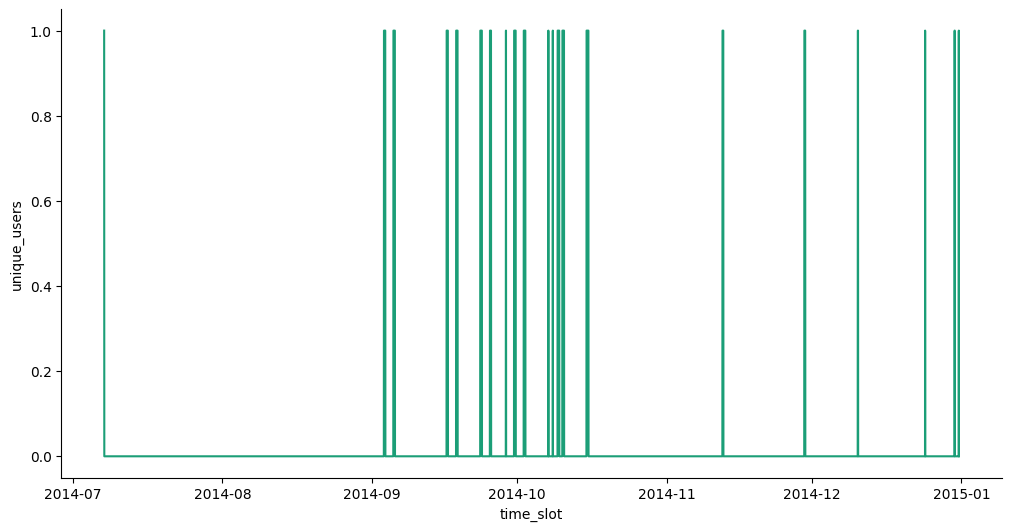

In [34]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_slot']
  ys = series['unique_users']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = res_df.sort_values('time_slot', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_slot')
_ = plt.ylabel('unique_users')

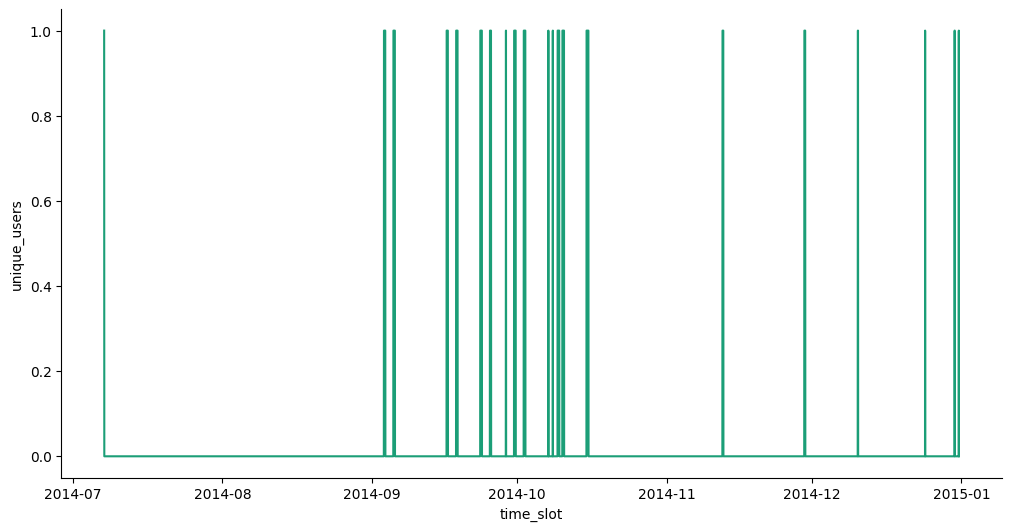

In [33]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_slot']
  ys = series['unique_users']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = res_df.sort_values('time_slot', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_slot')
_ = plt.ylabel('unique_users')

<Axes: xlabel='duration_hr', ylabel='Count'>

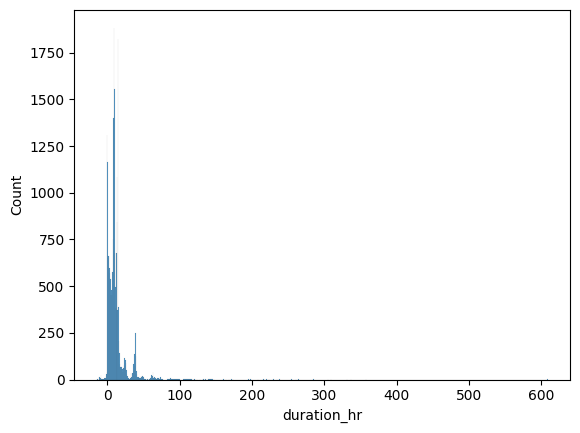

In [35]:
sns.histplot(df.duration_hr)

In [36]:
df.loc[df["duration_hr"]<0]

,charging_event_id,user_id,cp_id,con_num,start_date,start_time,end_date,end_time,total_kwh,site,charger_model,start_datetime,end_datetime,duration_hr,start_day,end_day,start_period,end_period,year
18,339452,14Q3User 631,70207,1,2014-11-22,10:47,2014-11-22,08:02,0.0,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-11-22 10:47:00,2014-11-22 08:02:00,-2.750000,Saturday,Saturday,morning,Invalid or Missing Time,2014
136,8710573,19Q3User 511,70207,1,2019-07-03,09:32,2019-07-03,08:02,0.0,Elland Road Park and Ride,APT 7kW Dual Outlet,2019-07-03 09:32:00,2019-07-03 08:02:00,-1.500000,Wednesday,Wednesday,morning,Invalid or Missing Time,2019
266,8729647,19Q3User 385,80081,1,2019-07-09,08:41,2019-07-09,08:02,0.0,Temple Green Park and Ride,APT 7kW Dual Outlet,2019-07-09 08:41:00,2019-07-09 08:02:00,-0.650000,Tuesday,Tuesday,morning,Invalid or Missing Time,2019
359,8744215,19Q3User 1105,80164,2,2019-07-13,11:49,2019-07-13,08:02,0.0,Elland Road Park and Ride,APT Triple Rapid Charger,2019-07-13 11:49:00,2019-07-13 08:02:00,-3.783333,Saturday,Saturday,morning,Invalid or Missing Time,2019
465,8759194,19Q3User 372,70203,1,2019-07-18,08:44,2019-07-18,08:02,0.0,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2019-07-18 08:44:00,2019-07-18 08:02:00,-0.700000,Thursday,Thursday,morning,Invalid or Missing Time,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22966,7965763,18Q3User 889,70204,2,2018-11-11,10:54,2018-11-11,08:02,0.0,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2018-11-11 10:54:00,2018-11-11 08:02:00,-2.866667,Sunday,Sunday,morning,Invalid or Missing Time,2018
23127,7997734,18Q3User 251,70207,1,2018-11-21,08:33,2018-11-21,08:02,0.0,Elland Road Park and Ride,APT 7kW Dual Outlet,2018-11-21 08:33:00,2018-11-21 08:02:00,-0.516667,Wednesday,Wednesday,morning,Invalid or Missing Time,2018
23262,8024503,18Q3User 889,70200,2,2018-11-29,08:07,2018-11-29,08:02,0.0,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2018-11-29 08:07:00,2018-11-29 08:02:00,-0.083333,Thursday,Thursday,morning,Invalid or Missing Time,2018
23294,8031853,18Q3User 893,70207,1,2018-12-01,10:29,2018-12-01,08:02,0.0,Elland Road Park and Ride,APT 7kW Dual Outlet,2018-12-01 10:29:00,2018-12-01 08:02:00,-2.450000,Saturday,Saturday,morning,Invalid or Missing Time,2018
